In [1]:
import pandas as pd
import numpy as np


In [2]:
dirPath ="C:/Users/Dell/PycharmProjects/pythonProject/stem_Dataset/stem_Dataset/"
sourceFilename ="data_math.csv"
destFilename="data_math_clean.csv"

dfSTEM = pd.read_csv('/content/data_math.csv')

#dfSTEM["Answer"]=dfSTEM["Answer"].replace({" ": "", "'": "", "[": "","]": ""}, inplace=True)

dfSTEM["Answer"]=dfSTEM["Answer"].str.replace("'", "")
dfSTEM["Answer"]=dfSTEM["Answer"].str.replace(" ", "")
dfSTEM["Answer"]=dfSTEM["Answer"].str.replace("[", "")
dfSTEM["Answer"]=dfSTEM["Answer"].str.replace("]", "")

dfSTEM[['A1', 'A2', 'A3', 'A4' ]]= dfSTEM.Answer.str.split(",",expand=True)

dfSTEM.to_csv('data_math_clean.csv')


In [3]:
dfSTEM.head()

,ID,Problem,Answer,Score,A1,A2,A3,A4
0,0,1,-1,5,-1,None,None,None
1,1,1,-4,0,-4,None,None,None
2,2,1,5,0,5,None,None,None
3,3,1,5,0,5,None,None,None
4,4,1,4,0,4,None,None,None


In [4]:
print("Number of missing Values per Feature:")
print(dfSTEM.isnull().sum())

Number of missing Values per Feature:
ID             0
Problem        0
Answer         0
Score          0
A1             0
A2          5000
A3         14196
A4         18342
dtype: int64


In [5]:
# Your code goes here
dfSTEM = dfSTEM.dropna(axis = 1, how ='any')
dfSTEM.head()

,ID,Problem,Answer,Score,A1
0,0,1,-1,5,-1
1,1,1,-4,0,-4
2,2,1,5,0,5
3,3,1,5,0,5
4,4,1,4,0,4


# Visualization


Text(0.5, 0, 'Problem')

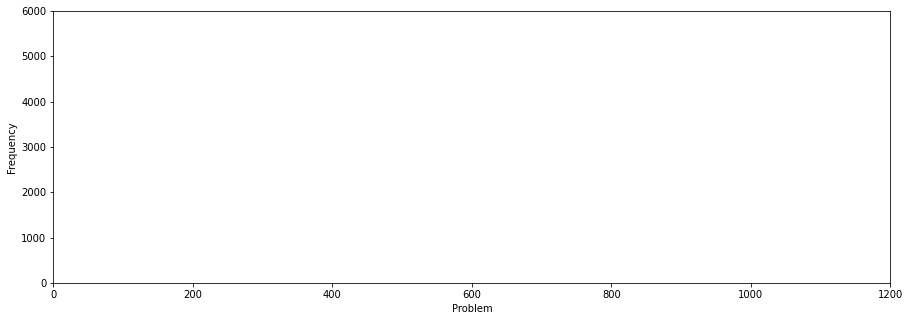

In [6]:
import matplotlib.pylab as plt
dfSTEM['Problem'].plot.hist(ylim=(0,6000),xlim=(0,1200),figsize=(15,5),bins=120)
plt.xlabel('Problem')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [8]:
dfSTEM = pd.DataFrame(dfSTEM)
  
# converting each value of column to a string
dfSTEM["Answer"] = pd.to_numeric(dfSTEM["Answer"], errors='coerce',downcast="float")
dfSTEM["A1"] = pd.to_numeric(dfSTEM["A1"], errors='coerce',downcast="float")
print(dfSTEM.dtypes)

ID           int64
Problem      int64
Answer     float32
Score        int64
A1         float32
dtype: object


In [9]:
dfSTEM = dfSTEM.dropna(axis = 0, how ='any')
dfSTEM.head()

,ID,Problem,Answer,Score,A1
0,0,1,-1.0,5,-1.0
1,1,1,-4.0,0,-4.0
2,2,1,5.0,0,5.0
3,3,1,5.0,0,5.0
4,4,1,4.0,0,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


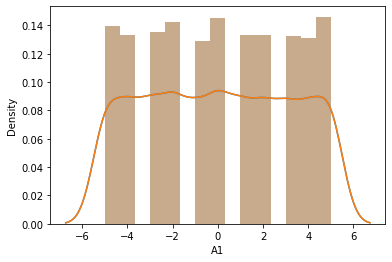

In [10]:
import seaborn as sns
sns.distplot(dfSTEM['Answer'])
sns.distplot(dfSTEM['A1'])

In [11]:
print(dfSTEM)

        ID  Problem  Answer  Score   A1
0        0        1    -1.0      5 -1.0
1        1        1    -4.0      0 -4.0
2        2        1     5.0      0  5.0
3        3        1     5.0      0  5.0
4        4        1     4.0      0  4.0
...    ...      ...     ...    ...  ...
4995  4995        1    -4.0      0 -4.0
4996  4996        1     5.0      0  5.0
4997  4997        1     0.0      0  0.0
4998  4998        1    -2.0      0 -2.0
4999  4999        1     2.0      0  2.0

[5000 rows x 5 columns]


# Naive Bayes Classifier


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
feature_cols = ['ID','Problem','Answer','A1']
X = dfSTEM[feature_cols]
Y = dfSTEM['Score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
y_pred=classifier.predict(X_test)
y_predtrain=classifier.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Accuracy:",accuracy_score(y_train,y_predtrain))


Accuracy: 1.0
Accuracy: 1.0


We see that there is no case of overfitting as the accuracy score for both the training and test dataset are equal.

# KNN Classifier


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)

In [19]:
accuracyknn = accuracy_score(y_test,y_pred1)
print("Accuracy:",accuracy_score(y_test,y_pred1))

Accuracy: 0.8709090909090909


In [20]:
knn2 = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn2.fit(X_train,y_train)
y_pred3=knn2.predict(X_test)

In [22]:
accuracyknn2 = accuracy_score(y_test,y_pred3)
print("Accuracy:",accuracyknn2)

Accuracy: 0.8963636363636364


It can be seen that the accuracy increases with the increase in n_neighbors

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred2=clf.predict(X_test)

In [24]:
accuracyrandom = accuracy_score(y_test,y_pred2)
print("Accuracy:",accuracyrandom)

Accuracy: 1.0


Check for which values of k we get the smallest mean square error

In [25]:
neighbors = list(range(1,40))
error = []

We find the mean error for each value of k

In [26]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
error

[0.1290909090909091,
 0.0993939393939394,
 0.11515151515151516,
 0.09818181818181818,
 0.10363636363636364,
 0.08969696969696969,
 0.09212121212121212,
 0.08727272727272728,
 0.08787878787878788,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728,
 0.08727272727272728]

We can produce the following plot by plotting these errors against the value of k:

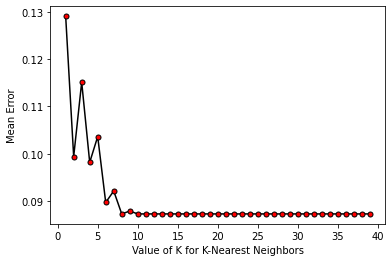

In [27]:
plt.plot(neighbors, error, color = 'black', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('Value of K for K-Nearest Neighbors')
plt.ylabel('Mean Error')
plt.show()

The smallest mean square can be seen around 15,20,25,30,35 and 40. Here, I have shown below the accuracy score for KNN with k equal to 15.

In [28]:
knn4 = KNeighborsClassifier(n_neighbors=15)

In [29]:
knn4.fit(X_train,y_train)
y_pred4=knn4.predict(X_test)

In [31]:
accuracyknn4 = accuracy_score(y_test,y_pred4)
print("Accuracy:",accuracy_score(y_test,y_pred4))

Accuracy: 0.9127272727272727


It can be seen that with a small mean square error, the accuracy score increases

Text(0.5, 15.0, 'Predicted outcome')

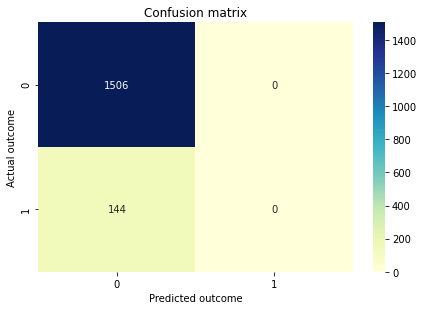

In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

In [33]:
!pip install keras

In [34]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim = X_train.shape[1]  # Number of features
modeldropout1 = Sequential()
modeldropout1.add(layers.Dense(1000, input_dim=input_dim, activation='relu'))
modeldropout1.add(layers.Dense(500,activation='relu'))
modeldropout1.add(layers.Dropout(0.7))
modeldropout1.add(layers.Dense(700,activation='relu'))
modeldropout1.add(layers.Dense(800,activation='relu'))
modeldropout1.add(layers.Dropout(0.8))
modeldropout1.add(layers.Dense(2, activation='softmax'))

In [36]:
modeldropout1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 700)               350700    
_________________________________________________________________
dense_3 (Dense)              (None, 800)               560800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1

In [37]:

modeldropout1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
modeldropout1.fit(X_train, y_train,epochs=10, batch_size=10, verbose=1)

Epoch 1/10
335/335 [==============================] - 5s 12ms/step - loss: 2.2013 - accuracy: 0.6782
Epoch 2/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.9137
Epoch 3/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.9087
Epoch 4/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.9036
Epoch 5/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2014 - accuracy: 0.8230
Epoch 6/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.2361
Epoch 7/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.2218
Epoch 8/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.6964
Epoch 9/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accuracy: 0.4030
Epoch 10/10
335/335 [==============================] - 4s 12ms/step - loss: 2.2015 - accura

In [38]:
g=modeldropout1.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
g

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
accuracykeras = accuracy_score(y_test,g)
print("Accuracy:",accuracykeras)

Accuracy: 0.0


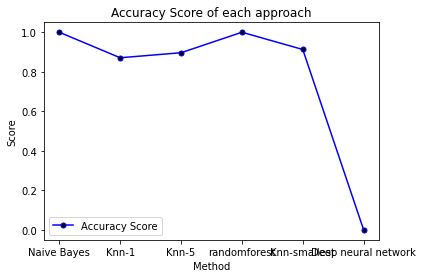

In [43]:
method = ['Naive Bayes', 'Knn-1', 'Knn-5', 'randomforest', 'Knn-smallest', 'Deep neural network']
accuracy = [accuracy, accuracyknn, accuracyknn2, accuracyrandom, accuracyknn4, accuracykeras]

plt.plot(method, accuracy, color = 'blue', label = "Accuracy Score", marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.xlabel("Method")
plt.ylabel("Score")
plt.title("Accuracy Score of each approach")
plt.legend()
plt.show()

We can see that the random forest and naive bayes have the highest accuracy score. On the other hand, neural network has the smallest accuracy score. There is small fluctuation in the accuracy score of knn-1 and knn-5.